 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [36]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [37]:
# Reading whale returns
whale_path = Path('../Starter_Code/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True)

print(whale_df.head(10))
print(whale_df.tail(10))

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
201

In [38]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [40]:
# Reading algorithmic returns
algo_path = Path('../Starter_Code/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True)

print(algo_df.head())
print(algo_df.tail())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
              Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358


In [41]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [42]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [43]:
# Reading S&P 500 Closing Prices
sp500_path = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], format='%d-%b-%y')
sp500_df.set_index('Date', inplace=True)

print(sp500_df.head())
print(sp500_df.tail())

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
               Close
Date                
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49


In [44]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [45]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "").astype("float")

In [46]:
# Calculate Daily Returns
sp500_df['S&P 500 Returns'] = sp500_df['Close'].pct_change()

In [47]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close              0
S&P 500 Returns    0
dtype: int64

In [48]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.drop(columns=['Close'], inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [49]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis=1).dropna()
combined_df.isnull().sum()
print(combined_df.head())
print(combined_df.tail())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  S&P 500 Re

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

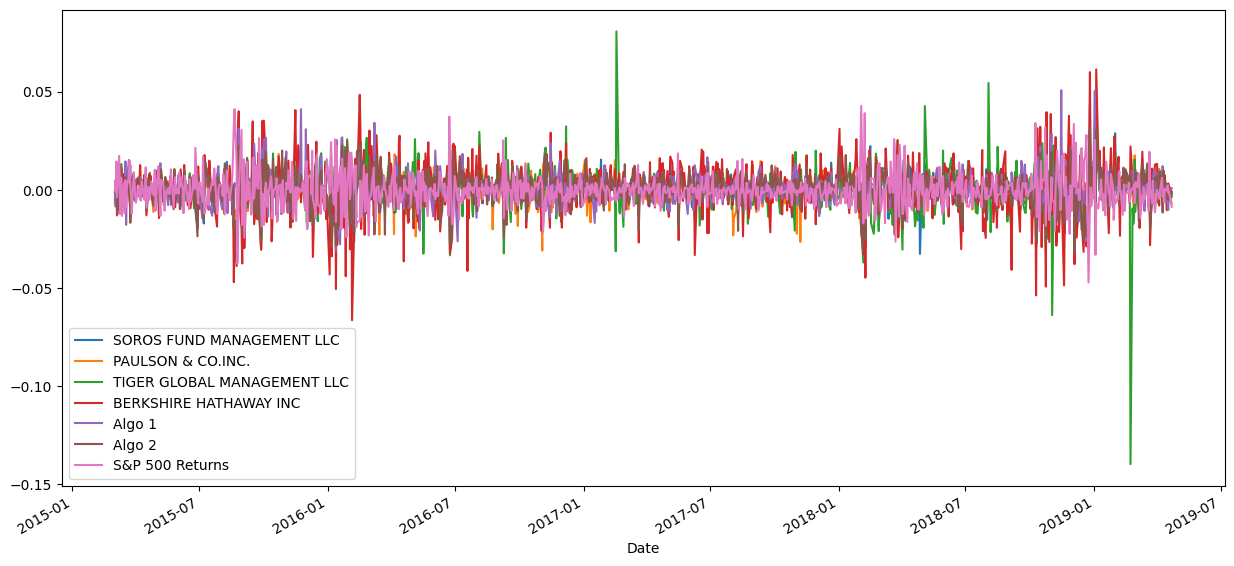

In [50]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,7))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

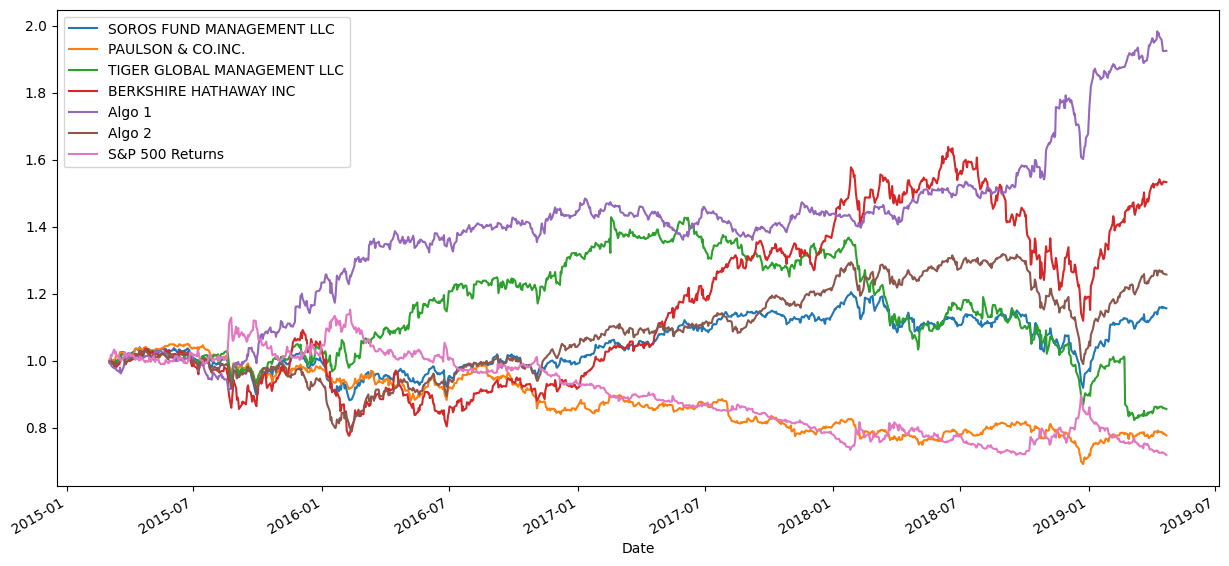

In [51]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

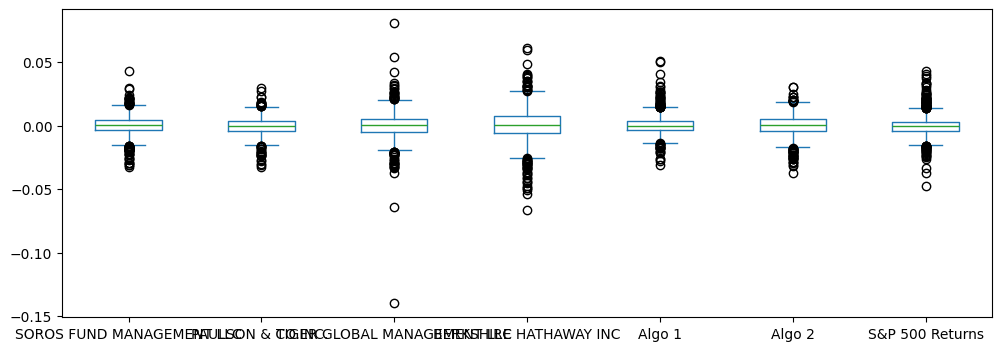

In [52]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(12,4))

### Calculate Standard Deviations

In [53]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Returns                0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [54]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df["S&P 500 Returns"].std()
print(sp500_std)
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > sp500_std]
print(riskier)

0.00858688974707399
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
sorted_annualized_std = annualized_std.sort_values()
print(sorted_annualized_std)

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500 Returns                0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21-Day Rolling Standard Deviation'}, xlabel='Date'>

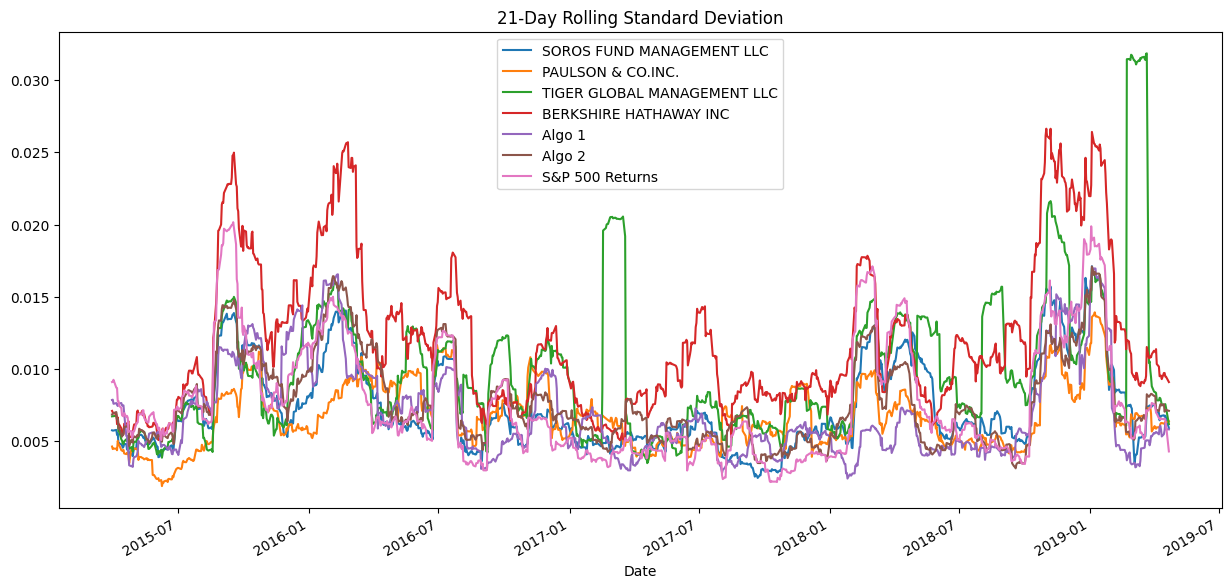

In [56]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,7), title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

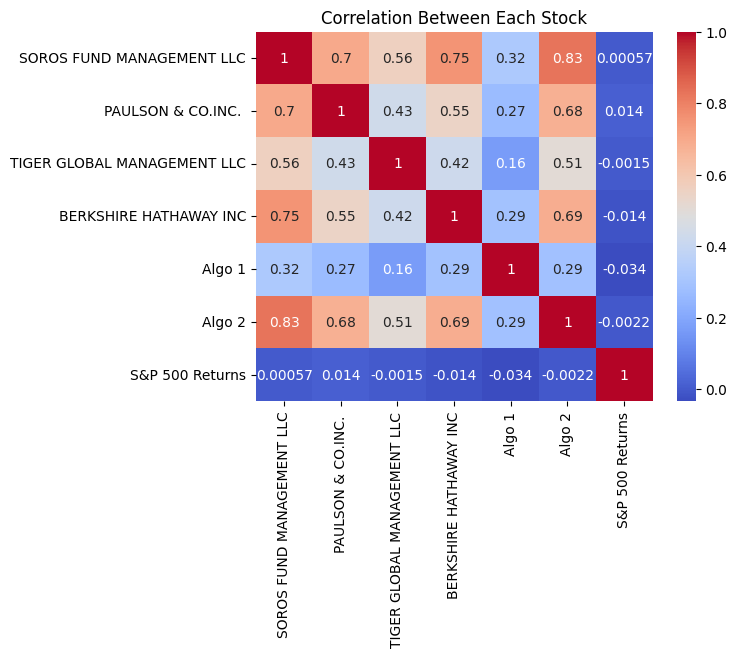

In [57]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Each Stock")
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': '60-Day Rolling Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

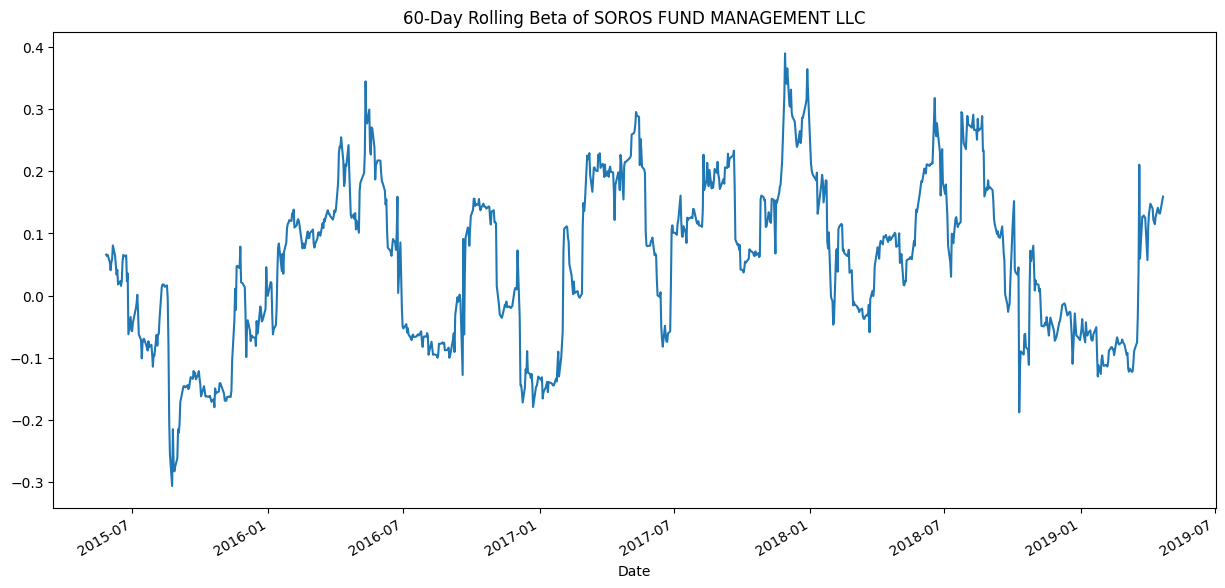

In [80]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500 Returns'])
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P 500 Returns'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(15,7), title=("60-Day Rolling Beta of SOROS FUND MANAGEMENT LLC"))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': '21-Day Exponentially Weighted Moving Standard Deviation for Each Portfolio'}, xlabel='Date'>

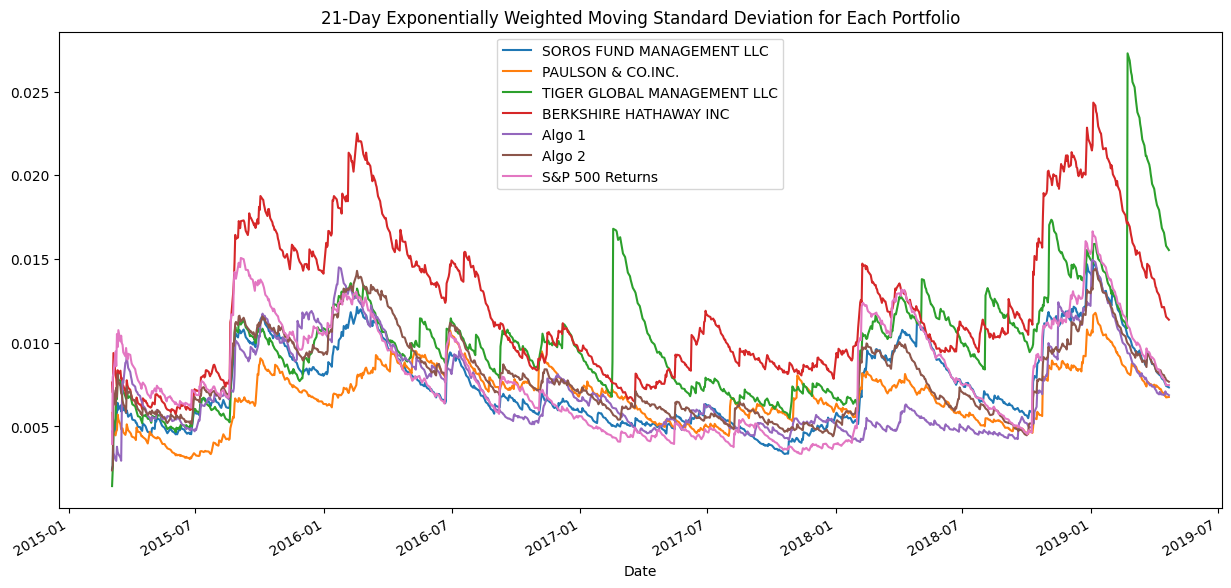

In [81]:
# Use `ewm` to calculate the rolling window
ewm_std = combined_df.ewm(halflife=21).std()
ewm_std.plot(figsize=(15,7), title=("21-Day Exponentially Weighted Moving Standard Deviation for Each Portfolio"))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Annualized Sharpe Ratios


In [61]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [62]:
# Reading data from 1st stock


In [63]:
# Reading data from 2nd stock


In [64]:
# Reading data from 3rd stock


In [65]:
# Combine all stocks in a single DataFrame


In [66]:
# Reset Date index


In [67]:
# Reorganize portfolio data by having a column per symbol


In [68]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [69]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [70]:
# Join your returns DataFrame to the original returns DataFrame


In [71]:
# Join your returns DataFrame to the original returns DataFrame


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [73]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [74]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [75]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Calculate Annualized Sharpe Ratios


In [77]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!